In [3]:
import pandas as pd, numpy as np
import json
import os
import matplotlib.pyplot as plt



In [4]:
merged_data_file = 'leftjoin_scopus_unpay.csv'
merged_data_file = 'data/merged_data/mg1540240368.csv'

In [5]:
#load merged file
jdf = pd.read_csv(merged_data_file, dtype={"affiliation": object, "openaccessFlag": object})


In [6]:
jdf.shape

(420371, 29)

In [7]:
#jdf[jdf.columns[12]].values


In [8]:
#jdf['year_sc'].dtype

In [9]:
#jdf['country'].sort_values().unique()

In [10]:
#jdf.head()

In [11]:
jdf=jdf[jdf['year_sc']<2018]
jdf.shape

(411047, 29)

In [12]:
jdf.columns

Index(['prism:doi', 'affiliation', 'citedby-count', 'dc:title', 'openaccess',
       'openaccessFlag', 'prism:coverDate', 'prism:coverDisplayDate',
       'prism:doi.1', 'prism:pageRange', 'prism:publicationName', 'subtype',
       'subj', 'year_sc', 'PAPER_TYPE_SC', 'country', 'Country Code', 'Region',
       'IncomeGroup', 'TableName', 'Unnamed: 0', 'best_oa_location',
       'data_standard', 'genre', 'is_oa', 'journal_name', 'publisher', 'title',
       'year_upw'],
      dtype='object')

In [13]:
jdf.describe

<bound method NDFrame.describe of                                      prism:doi  \
0                    10.1352/1934-9556-50.2.79   
1                         10.3917/spi.061.0069   
2                    10.1016/j.jad.2012.05.005   
3                         10.5706/nph201212003   
4                             10.1037/a0026821   
5                    10.1007/s12529-011-9185-2   
6                        10.3917/eslm.142.0031   
7                             10.1037/a0027782   
8                        10.3917/empa.087.0097   
9                             10.1002/pon.2037   
10                 10.1016/j.appet.2012.08.019   
11                            10.1002/smi.2459   
12                10.1080/09540121.2012.672724   
13                   10.1163/15685373-12342077   
14                10.1080/09540121.2012.672718   
15      10.1016/j.neuropsychologia.2012.10.010   
16                10.1016/j.addbeh.2012.07.006   
17                   10.1163/18784763-00002401   
18              

# metrics

## OA by time, subject and country

### aggregate by year, country, subject, based on OA.  
for the data standasrds 1 and 2 in UPW, and for the scopus OA flags

In [14]:
def rename(f):
    f.rename(columns={'mean': 'mean citations', 'sum':'total citations', 
                      'median':'median citations','size': 'total', 'std':'std citations'}, 
             inplace=True)  
    return f
  
def drop_and_rename(f):
    f.columns = f.columns.droplevel(0)
    f.tail()
    f=rename(f)
    f=f.unstack(-1) #unstack the last column of the index, which is the true/false OA

    return f
  

In [15]:
up_oa = jdf.groupby(['year_sc', 'PAPER_TYPE_SC','is_oa']).agg({
    'citedby-count': ['mean', 'sum', 'median', 'std'],
    'dc:title': 'size'
} )
scopus_oa = jdf.groupby(['year_sc','PAPER_TYPE_SC', 'openaccessFlag']).agg({
    'citedby-count': ['mean', 'sum', 'median', 'std'],
    'dc:title': 'size'
} )

up_oa.tail()
up_oa = rename(up_oa)
up_oa.columns = up_oa.columns.droplevel(0)


## citations by open access according to unpaywall

In [16]:
up_oa

mean citations  total citations  \
year_sc PAPER_TYPE_SC is_oa                                    
2000    CONF          False        5.035897            982.0   
                      True        21.588235            734.0   
2001    CONF          False        5.438525           1327.0   
                      True        17.621622            652.0   
2002    CONF          False        6.879518           6281.0   
                      True        17.138462           1114.0   
2003    CONF          False        6.538150           9683.0   
                      True        11.219780           1021.0   
2004    CONF          False        6.718135           9224.0   
                      True        14.048077           1461.0   
2005    CONF          False        5.063920           9586.0   
                      True        17.474026           5382.0   
2006    CONF          False        4.726619           6570.0   
                      True        11.910448           2394.0   
2007    CONF          False        3.362877           5236.0   
                      True        11.822581           1466.0   
2008    CONF          False        5.511244          11028.0   
                      True        16.699346           5110.0   
        JOURNAL       False       22.971496         126527.0   
                      True        35.251491          70926.0   
2009    CONF          False        4.665575           9975.0   
                      True        11.467505           5470.0   
        JOURNAL       False       25.941539         122029.0   
                      True        34.841121          44736.0   
2010    CONF          False        2.794082           6988.0   
                      True         5.631811           3824.0   
        JOURNAL       False       20.731070          95280.0   
                      True        37.019080          65968.0   
2011    CONF          False        2.648414           7932.0   
                      True         5.856000           5124.0   
        JOURNAL       False       18.812459          85766.0   
                      True        24.201717          33834.0   
2012    CONF          False        3.063953           9486.0   
                      True         5.638824           4793.0   
        JOURNAL       False       14.739640          65444.0   
                      True        22.995745          43232.0   
2013    CONF          False        2.750526           7850.0   
                      True         5.381513           3202.0   
        JOURNAL       False       14.266055          41985.0   
                      True        15.795739          12605.0   
2014    CONF          False        2.295819           5161.0   
                      True         5.064767           1955.0   
        JOURNAL       False       12.417722          93195.0   
                      True        13.127814          52485.0   
2015    CONF          False        1.703536           9056.0   
                      True         2.505519           3405.0   
        JOURNAL       False        7.397035          27946.0   
                      True        10.065145          21167.0   
2016    CONF          False        1.192157           3040.0   
                      True         1.639418           1464.0   
        JOURNAL       False        6.384124          40935.0   
                      True         7.615528          28543.0   
2017    CONF          False        0.524228           2088.0   
                      True         0.457870           1277.0   
        JOURNAL       False        2.788001          20121.0   
                      True         2.327617           7737.0   

                             median citations  std citations  total  
year_sc PAPER_TYPE_SC is_oa                                          
2000    CONF          False               1.0      13.741492    195  
                      True                5.5      74.524805     34  
2001    CONF          False         

In [17]:
scopus_oa = rename(scopus_oa)
scopus_oa.columns = scopus_oa.columns.droplevel(0)


## citations by open access according to SCOPUS

In [18]:
scopus_oa

,,,mean citations,total citations,median citations,std citations,total
year_sc,PAPER_TYPE_SC,openaccessFlag,,,,,
2000,CONF,False,6.056761,7256.0,1.0,20.188256,1198
2001,CONF,False,7.445623,8421.0,2.0,25.256654,1131
2002,CONF,False,7.171251,21901.0,2.0,19.916477,3054
2003,CONF,False,6.731338,40489.0,2.0,23.609624,6015
2004,CONF,False,8.270655,30833.0,2.0,30.902314,3728
2005,CONF,False,7.567907,48813.0,2.0,24.009892,6450
2006,CONF,False,5.896468,36564.0,2.0,16.842628,6201
2007,CONF,False,5.051347,45942.0,1.0,17.968196,9095
2008,CONF,False,5.538362,64317.0,2.0,15.773004,11613


## Analysis by subject

In [19]:
up_bysubj = jdf.groupby(['year_sc', 'PAPER_TYPE_SC','subj','is_oa']).agg({
    'citedby-count': ['mean', 'sum', 'median'],
    'dc:title': 'size'
} )
scopus_bysubj = jdf.groupby(['year_sc','PAPER_TYPE_SC', 'subj','openaccessFlag']).agg({
    'citedby-count': ['mean', 'sum', 'median'],
    'dc:title': 'size'
} )

up_bysubj.tail()
up_bysubj = rename(up_bysubj)
up_bysubj.columns = up_bysubj.columns.droplevel(0)

scopus_bysubj.tail()
scopus_bysubj = rename(scopus_bysubj)
scopus_bysubj.columns = scopus_bysubj.columns.droplevel(0)

In [20]:
scopus_bysubj.tail()

mean citations  total citations  \
year_sc PAPER_TYPE_SC subj openaccessFlag                                    
2017    JOURNAL       PHYS True                  0.802817             57.0   
                      SOCI False                 1.662727           3658.0   
                           True                  2.192308            399.0   
                      VETE False                 1.085399            394.0   
                           True                  2.857143            100.0   

                                           median citations  total  
year_sc PAPER_TYPE_SC subj openaccessFlag                           
2017    JOURNAL       PHYS True                         0.0     71  
                      SOCI False                        1.0   2200  
                           True                         1.0    182  
                      VETE False                        0.0    363  
                           True                         1.0     35

In [21]:
# up_bysubj.index[10]
# joa_by_year_up.loc[idx[:,  ['CONF']], idx[:, :]].tail()
mask = up_bysubj.index.get_level_values(2)=='COMP'
up_compdf = up_bysubj[mask]

In [22]:
up_compdf

mean citations  total citations  \
year_sc PAPER_TYPE_SC subj is_oa                                    
2001    CONF          COMP False        3.752577            364.0   
                           True        20.000000            320.0   
2002    CONF          COMP False        0.500000              1.0   
                           True        11.000000             22.0   
2003    CONF          COMP False       10.438202            929.0   
                           True        13.944444            251.0   
2004    CONF          COMP False        6.022059           1638.0   
                           True        14.592593            394.0   
2005    CONF          COMP False        5.636103           3934.0   
                           True        22.110465           3803.0   
2006    CONF          COMP False        6.435484           3591.0   
                           True        16.372727           1801.0   
2007    CONF          COMP False        6.833333            123.0   
                           True         9.500000             57.0   
2008    CONF          COMP False        6.306202           1627.0   
                           True        20.989899           2078.0   
        JOURNAL       COMP False       16.189076           3853.0   
                           True        18.495495           2053.0   
2009    CONF          COMP False        5.559501           5793.0   
                           True        13.916944           4189.0   
2010    CONF          COMP False        7.764706            132.0   
                           True         0.500000              1.0   
        JOURNAL       COMP False       20.458333            982.0   
                           True        28.400000            994.0   
2011    CONF          COMP False        4.619048             97.0   
                           True        15.000000             45.0   
        JOURNAL       COMP False       18.225086          10607.0   
                           True        18.161435           4050.0   
2012    CONF          COMP False        4.862069           1128.0   
                           True         9.881356            583.0   
        JOURNAL       COMP False       11.619870          10760.0   
                           True        19.370690           6741.0   
2013    CONF          COMP False        3.111494           2707.0   
                           True         7.720000           1158.0   
        JOURNAL       COMP False        8.113475           1144.0   
                           True        12.641509            670.0   
2014    CONF          COMP False        3.648855            956.0   
                           True        10.000000            580.0   
        JOURNAL       COMP False       12.814083          20746.0   
                           True        12.255515           6667.0   
2015    CONF          COMP False        2.675284           2587.0   
                           True         4.331288            706.0   
        JOURNAL       COMP False        7.880068           4665.0   
                           True         7.901288           1841.0   
2016    CONF          COMP False        1.643564            332.0   
                           True         4.591837            225.0   
2017    CONF          COMP False        0.889246            554.0   
                           True         0.932039             96.0   
        JOURNAL       COMP False        2.257310            386.0   
                           True         2.413333            181.0   

                                  median citations  total  
year_sc PAPER_TYPE_SC subj is_oa                           
2001    CONF          COMP False               1.0     97  
                           True                8.0     16  
2002    CONF          COMP False               0.5      2  
                           True               11.0      2  
2003    CONF          COMP False               2.0     89  
                         

In [23]:
compdf = jdf[jdf['subj']=='COMP']

In [24]:
comp_pubnames = compdf.groupby('prism:publicationName').agg(['count'])['Unnamed: 0']

In [25]:
comp_pubnames.sort_values(by=['count'],ascending=False)


,count
prism:publicationName,
Proceedings of SPIE - The International Society for Optical Engineering,4400
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics),3967
ACM International Conference Proceeding Series,535
International Geoscience and Remote Sensing Symposium (IGARSS),469
"ICASSP, IEEE International Conference on Acoustics, Speech and Signal Processing - Proceedings",371
Communications in Computer and Information Science,310
IEEE Vehicular Technology Conference,280
IEEE International Conference on Communications,239
"Proceedings - Frontiers in Education Conference, FIE",235


# *****READ UNTIL HERE ONLY*****

In [364]:
up_oa = jdf.groupby(['year_sc','subj','country', 'IncomeGroup', 'Region', 'PAPER_TYPE_SC','is_oa']).agg({
    'citedby-count': ['mean', 'sum', 'median'],
    'dc:title': 'size'
} )
scopus_oa = jdf.groupby(['year_sc','subj','country', 'IncomeGroup', 'Region','PAPER_TYPE_SC', 'openaccessFlag']).agg({
    'citedby-count': ['mean', 'sum', 'median'],
    'dc:title': 'size'
} )

up_oa.head()

citedby-count  \
                                                                                                  mean   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC is_oa                 
2000    AGRI Australia High income         East Asia & Pacific       CONF          False      4.000000   
                                                                                   True      12.000000   
             Austria   High income         Europe & Central Asia     CONF          False      1.000000   
             Belgium   High income         Europe & Central Asia     CONF          False      8.000000   
             Brazil    Upper middle income Latin America & Caribbean CONF          False      6.666667   

                                                                                              \
                                                                                         sum   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC is_oa       
2000    AGRI Australia High income         East Asia & Pacific       CONF          False  12   
                                                                                   True   12   
             Austria   High income         Europe & Central Asia     CONF          False   2   
             Belgium   High income         Europe & Central Asia     CONF          False   8   
             Brazil    Upper middle income Latin America & Caribbean CONF          False  20   

                                                                                                 \
                                                                                         median   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC is_oa          
2000    AGRI Australia High income         East Asia & Pacific       CONF          False    1.0   
                                                                                   True    12.0   
             Austria   High income         Europe & Central Asia     CONF          False    1.0   
             Belgium   High income         Europe & Central Asia     CONF          False    8.0   
             Brazil    Upper middle income Latin America & Caribbean CONF          False    3.0   

                                                                                         dc:title  
                                                                                             size  
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC is_oa           
2000    AGRI Australia High income         East Asia & Pacific       CONF          False        3  
                                                                                   True         1  
             Austria   High income         Europe & Central Asia     CONF          False        2  
             Belgium   High income         Europe & Central Asia     CONF          False        1  
             Brazil    Upper middle income Latin America & Caribbean CONF          False        3

In [308]:
scopus_oa.head()

citedby-count  \
                                                                                                           mean   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC openaccessFlag                 
2000    AGRI Australia High income         East Asia & Pacific       CONF          False               6.000000   
             Austria   High income         Europe & Central Asia     CONF          False               1.000000   
             Belgium   High income         Europe & Central Asia     CONF          False               8.000000   
             Brazil    Upper middle income Latin America & Caribbean CONF          False               6.666667   
             Colombia  Upper middle income Latin America & Caribbean CONF          False               8.000000   

                                                                                                       \
                                                                                                  sum   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC openaccessFlag       
2000    AGRI Australia High income         East Asia & Pacific       CONF          False           24   
             Austria   High income         Europe & Central Asia     CONF          False            2   
             Belgium   High income         Europe & Central Asia     CONF          False            8   
             Brazil    Upper middle income Latin America & Caribbean CONF          False           20   
             Colombia  Upper middle income Latin America & Caribbean CONF          False            8   

                                                                                                          \
                                                                                                  median   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC openaccessFlag          
2000    AGRI Australia High income         East Asia & Pacific       CONF          False             6.0   
             Austria   High income         Europe & Central Asia     CONF          False             1.0   
             Belgium   High income         Europe & Central Asia     CONF          False             8.0   
             Brazil    Upper middle income Latin America & Caribbean CONF          False             3.0   
             Colombia  Upper middle income Latin America & Caribbean CONF          False             8.0   

                                                                                                  dc:title  
                                                                                                      size  
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC openaccessFlag           
2000    AGRI Australia High income         East Asia & Pacific       CONF          False                 4  
             Austria   High income         Europe & Central Asia     CONF          False                 2  
             Belgium   High income         Europe & Central Asia     CONF          False                 1  
             Brazil    Upper middle income Latin America & Caribbean CONF          False                 3  
             Colombia  Upper middle income Latin America & Caribbean CONF          False                 1

In [365]:
up_dropped_oa = drop_and_rename(up_oa)
scopus_dropped_oa = drop_and_rename(scopus_oa)
up_dropped_oa.head()

mean citations  \
is_oa                                                                                       False   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC                  
2000    AGRI Australia High income         East Asia & Pacific       CONF                4.000000   
             Austria   High income         Europe & Central Asia     CONF                1.000000   
             Belgium   High income         Europe & Central Asia     CONF                8.000000   
             Brazil    Upper middle income Latin America & Caribbean CONF                6.666667   
             Colombia  Upper middle income Latin America & Caribbean CONF                8.000000   

                                                                                          \
is_oa                                                                              True    
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC         
2000    AGRI Australia High income         East Asia & Pacific       CONF           12.0   
             Austria   High income         Europe & Central Asia     CONF            NaN   
             Belgium   High income         Europe & Central Asia     CONF            NaN   
             Brazil    Upper middle income Latin America & Caribbean CONF            NaN   
             Colombia  Upper middle income Latin America & Caribbean CONF            NaN   

                                                                                   total citations  \
is_oa                                                                                        False   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC                   
2000    AGRI Australia High income         East Asia & Pacific       CONF                     12.0   
             Austria   High income         Europe & Central Asia     CONF                      2.0   
             Belgium   High income         Europe & Central Asia     CONF                      8.0   
             Brazil    Upper middle income Latin America & Caribbean CONF                     20.0   
             Colombia  Upper middle income Latin America & Caribbean CONF                      8.0   

                                                                                          \
is_oa                                                                              True    
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC         
2000    AGRI Australia High income         East Asia & Pacific       CONF           12.0   
             Austria   High income         Europe & Central Asia     CONF            NaN   
             Belgium   High income         Europe & Central Asia     CONF            NaN   
             Brazil    Upper middle income Latin America & Caribbean CONF            NaN   
             Colombia  Upper middle income Latin America & Caribbean CONF            NaN   

                                                                                   median citations  \
is_oa                                                                                         False   
year_sc subj country   IncomeGroup         Region                    PAPER_TYPE_SC                    
2000    AGRI Australia High income         East Asia & Pacific       CONF                       1.0   
             Austria   High income         Europe & Central Asia     CONF                       1.0   
             Belgium   High income         Europe & Central Asia     CONF                       8.0   
             Brazil    Upper middle income Latin America & Caribbean CONF                       3.0   
             Colombia  Upper middle income Latin America & Caribbean CONF                       8.0   

                                                                                          \
is_oa                                                             

In [331]:
joa_by_year_up = up_dropped_oa.groupby([up_dropped_oa.index.get_level_values('year_sc'),
                                       up_dropped_oa.index.get_level_values('PAPER_TYPE_SC')]).agg({
    ("total citations", False):sum, ("total citations", True):sum,
#     ("total citations_scopus", False):sum, ("total citations_scopus", True):sum,
    ("total", False):sum, ("total", True):sum,
#     ("total_scopus", False):sum, ("total_scopus", True):sum,
    } )

joa_by_year_scopus = scopus_dropped_oa.groupby([scopus_dropped_oa.index.get_level_values('year_sc'),
                                               scopus_dropped_oa.index.get_level_values('PAPER_TYPE_SC')]).agg({
    ("total citations", False):sum, ("total citations", True):sum,
#     ("total citations_scopus", False):sum, ("total citations_scopus", True):sum,
    ("total", False):sum, ("total", True):sum,
#     ("total_scopus", False):sum, ("total_scopus", True):sum,
    } )

joa_by_year_up.tail()

total citations            total        
                                False   True     False   True 
year_sc PAPER_TYPE_SC                                         
2015    JOURNAL                  85.0    89.0     22.0    11.0
2016    CONF                  16105.0  5107.0  13114.0  3973.0
        JOURNAL                  67.0    38.0     67.0    36.0
2017    CONF                  12209.0  3007.0  20935.0  6145.0
2018    CONF                    575.0   164.0   6413.0  1909.0

In [501]:
joa_by_year_up.index

MultiIndex(levels=[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], ['CONF', 'JOURNAL']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 15, 16, 16, 17, 18], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]],
           names=['year_sc', 'PAPER_TYPE_SC'])

In [354]:
idx = pd.IndexSlice
joa_by_year_up.loc[idx[:,  ['CONF']], idx[:, :]].tail()

total citations             total        
                                False    True     False   True 
year_sc PAPER_TYPE_SC                                          
2014    CONF                  19004.0   5727.0   7936.0  2422.0
2015    CONF                  34593.0  10164.0  19084.0  5467.0
2016    CONF                  16105.0   5107.0  13114.0  3973.0
2017    CONF                  12209.0   3007.0  20935.0  6145.0
2018    CONF                    575.0    164.0   6413.0  1909.0

In [356]:
joa_by_year_up.loc[idx[:,  ['JOURNAL']], idx[:, :]].tail()

total citations           total       
                                False    True   False  True 
year_sc PAPER_TYPE_SC                                       
2010    JOURNAL               37920.0  11223.0  434.0  131.0
2015    JOURNAL                  85.0     89.0   22.0   11.0
2016    JOURNAL                  67.0     38.0   67.0   36.0

In [319]:
def compute_oa_up_percentages(df):
    #print(df.head())
    df['mean_citations_is_oa'] = np.nan
    df['oa_perc_up'] = df[ ('total',True) ] / (df[ ('total',False) ] +  df[ ('total',True) ] ) 
    #if (df[ ('total citations_up', True) ]):
    df['mean_citations_is_oa_up'] =  df[ ('total citations', True) ] / df[ ('total',True) ] 
    df['mean_citations_not_oa_up'] =  df[ ('total citations',False) ] / df[ ('total',False) ] 
    df['mean_citations_ratio_up'] = df['mean_citations_is_oa_up'] / df['mean_citations_not_oa_up']
    return df

def compute_percentages(df):
    #print(df.head())
    df['mean_citations_is_oa'] = np.nan
    df['oa_perc'] = df[ ('total',True) ] / (df[ ('total',False) ] +  df[ ('total',True) ] ) 
    #if (df[ ('total citations_up', True) ]):
    df['mean_citations_is_oa'] =  df[ ('total citations', True) ] / df[ ('total',True) ] 
    df['mean_citations_not_oa'] =  df[ ('total citations',False) ] / df[ ('total',False) ] 
    df['mean_citations_ratio'] = df['mean_citations_is_oa'] / df['mean_citations_not_oa']
    return df

def drop(f):
    f.columns = f.columns.droplevel(0)
    f=f.unstack(-1) #unstack the last column of the index, which is the true/false OA
    return f

In [357]:
joa_by_year_up = compute_percentages(joa_by_year_up)
joa_by_year_scopus = compute_percentages(joa_by_year_scopus)

In [360]:
joa_by_year_up.loc[idx[:,  ['JOURNAL']], idx[:, :]].tail()

total citations           total         \
                                False     True  False   True   
year_sc PAPER_TYPE_SC                                          
2010    JOURNAL               37920.0  11223.0  434.0  131.0   
2015    JOURNAL                  85.0     89.0   22.0   11.0   
2016    JOURNAL                  67.0     38.0   67.0   36.0   

                      mean_citations_is_oa   oa_perc mean_citations_not_oa  \
                                                                             
year_sc PAPER_TYPE_SC                                                        
2010    JOURNAL                  85.671756  0.231858             87.373272   
2015    JOURNAL                   8.090909  0.333333              3.863636   
2016    JOURNAL                   1.055556  0.349515              1.000000   

                      mean_citations_ratio  
                                            
year_sc PAPER_TYPE_SC                       
2010    JOURNAL                   0.980526  
2015    JOURNAL                   2.094118  
2016    JOURNAL                   1.055556

In [359]:
joa_by_year_up.tail()

total citations            total          \
                                False    True    False    True   
year_sc PAPER_TYPE_SC                                            
2015    JOURNAL                  85.0    89.0     22.0    11.0   
2016    CONF                  16105.0  5107.0  13114.0  3973.0   
        JOURNAL                  67.0    38.0     67.0    36.0   
2017    CONF                  12209.0  3007.0  20935.0  6145.0   
2018    CONF                    575.0   164.0   6413.0  1909.0   

                      mean_citations_is_oa   oa_perc mean_citations_not_oa  \
                                                                             
year_sc PAPER_TYPE_SC                                                        
2015    JOURNAL                   8.090909  0.333333              3.863636   
2016    CONF                      1.285427  0.232516              1.228077   
        JOURNAL                   1.055556  0.349515              1.000000   
2017    CONF                      0.489341  0.226920              0.583186   
2018    CONF                      0.085909  0.229392              0.089662   

                      mean_citations_ratio  
                                            
year_sc PAPER_TYPE_SC                       
2015    JOURNAL                   2.094118  
2016    CONF                      1.046699  
        JOURNAL                   1.055556  
2017    CONF                      0.839082  
2018    CONF                      0.958145

In [330]:
joa_by_year_up.columns.get_l('PAPER_TYPE_SC')


Index(['CONF', 'JOURNAL', 'CONF', 'JOURNAL', 'CONF', 'JOURNAL', 'CONF',
       'JOURNAL', 'CONF', 'JOURNAL', 'CONF', 'JOURNAL', 'CONF', 'JOURNAL',
       'CONF', 'JOURNAL'],
      dtype='object', name='PAPER_TYPE_SC')

In [326]:
joa_by_year_up[None, None, 'PAPER_TYPE_SC']

KeyError: (None, None, 'PAPER_TYPE_SC')

In [323]:
mask = joa_by_year_up['PAPER_TYPE_SC']=='CONF'
joa_by_year_up[mask].tail()

KeyError: 'PAPER_TYPE_SC'

In [ ]:

up_ax = joa_by_year_up[mask].plot(y=['oa_perc'], xticks=range(2000,2019,2), figsize=(14,5) )

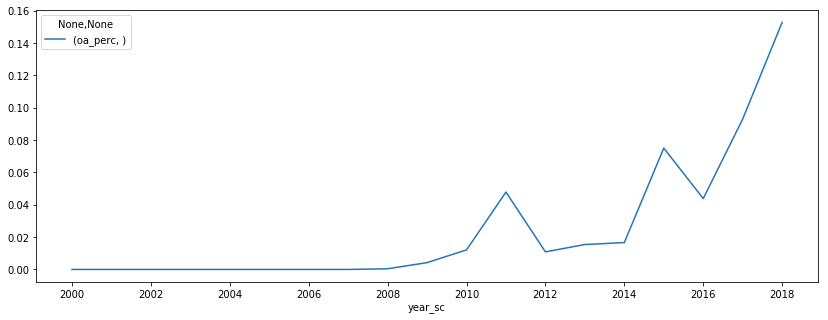

In [275]:
scopus_ax = joa_by_year_scopus.plot(y=['oa_perc'], xticks=range(2000,2019,2), figsize=(14,5) )

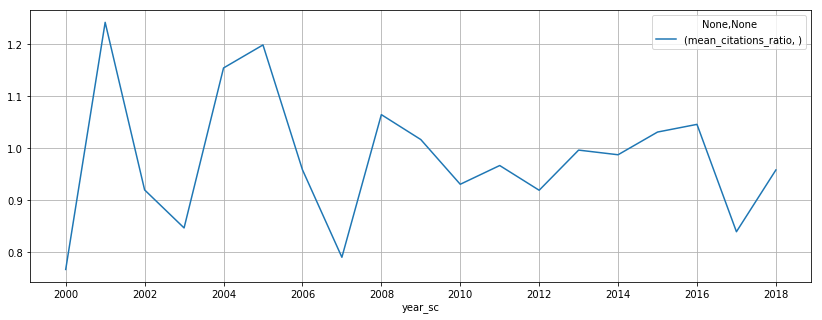

In [277]:
up_cit = joa_by_year_up.plot(y=['mean_citations_ratio'], xticks=range(2000,2019,2), figsize=(14,5) )

up_cit.grid(True,  axis='y' )
up_cit.grid(True)

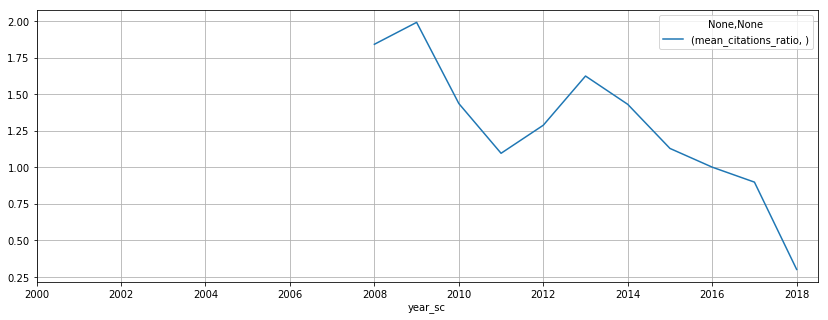

In [278]:
up_scopus = joa_by_year_scopus.plot(y=['mean_citations_ratio'], xticks=range(2000,2019,2), figsize=(14,5) )

up_scopus.grid(True,  axis='y' )
up_scopus.grid(True)

In [179]:
#group by 'year_sc','subj','country','is_oa' based on unpaywall OA criteria
adf_ds2 = jdf[jdf['data_standard']==2].groupby(['year_sc','subj','country', 'IncomeGroup','Region','is_oa']).agg({'citedby-count': ['mean', 'sum', 'median'], 'dc:title': 'size'})
#group by 'year_sc','subj','country','openaccessFlag' based on scopus OA criteria
adf_scopusOA = jdf.groupby(['year_sc','subj','country', 'IncomeGroup','Region','openaccessFlag']).agg({'citedby-count': ['mean', 'sum', 'median'], 'dc:title': 'size'})

In [181]:

adf_ds2 = drop_and_rename(adf_ds2)
adf_scopusOA = drop_and_rename(adf_scopusOA)
aj=adf_ds2.join(adf_scopusOA,lsuffix='_up',rsuffix='_scopus', how='outer')    

In [140]:
aj.head()

mean citations_up  \
is_oa                                                                            False   
year_sc subj country   IncomeGroup         Region                                        
2000    AGRI Australia High income         East Asia & Pacific                     1.0   
             Austria   High income         Europe & Central Asia                   0.0   
             Belgium   High income         Europe & Central Asia                   8.0   
             Brazil    Upper middle income Latin America & Caribbean               3.0   
             Colombia  Upper middle income Latin America & Caribbean               8.0   

                                                                            \
is_oa                                                                True    
year_sc subj country   IncomeGroup         Region                            
2000    AGRI Australia High income         East Asia & Pacific         NaN   
             Austria   High income         Europe & Central Asia       NaN   
             Belgium   High income         Europe & Central Asia       NaN   
             Brazil    Upper middle income Latin America & Caribbean   NaN   
             Colombia  Upper middle income Latin America & Caribbean   NaN   

                                                                     total citations_up  \
is_oa                                                                             False   
year_sc subj country   IncomeGroup         Region                                         
2000    AGRI Australia High income         East Asia & Pacific                      1.0   
             Austria   High income         Europe & Central Asia                    0.0   
             Belgium   High income         Europe & Central Asia                    8.0   
             Brazil    Upper middle income Latin America & Caribbean                3.0   
             Colombia  Upper middle income Latin America & Caribbean                8.0   

                                                                            \
is_oa                                                                True    
year_sc subj country   IncomeGroup         Region                            
2000    AGRI Australia High income         East Asia & Pacific         NaN   
             Austria   High income         Europe & Central Asia       NaN   
             Belgium   High income         Europe & Central Asia       NaN   
             Brazil    Upper middle income Latin America & Caribbean   NaN   
             Colombia  Upper middle income Latin America & Caribbean   NaN   

                                                                     median citations_up  \
is_oa                                                                              False   
year_sc subj country   IncomeGroup         Region                                          
2000    AGRI Australia High income         East Asia & Pacific                       1.0   
             Austria   High income         Europe & Central Asia                     0.0   
             Belgium   High income         Europe & Central Asia                     8.0   
             Brazil    Upper middle income Latin America & Caribbean                 3.0   
             Colombia  Upper middle income Latin America & Caribbean                 8.0   

                                                                            \
is_oa                                                                True    
year_sc subj country   IncomeGroup         Region                            
2000    AGRI Australia High income         East Asia & Pacific         NaN   
             Austria   High income         Europe & Central Asia       NaN   
             Belgium   High income         Europe & Central Asia       NaN   
             Brazil    Upper middle income Latin America & Caribbean   NaN   
             Colombia  Upper middle income Latin America & Caribbean   NaN   

       

## Group by year

In [141]:
oa_by_year = aj.groupby(aj.index.get_level_values('year_sc')).agg({
    ("total citations_up", False):sum, ("total citations_up", True):sum,
    ("total citations_scopus", False):sum, ("total citations_scopus", True):sum,
    ("total_up", False):sum, ("total_up", True):sum,
    ("total_scopus", False):sum, ("total_scopus", True):sum,
    } )
# oa_by_year = adf_ds2.groupby(aj2.index.get_level_values('year_sc')).agg({("total_df1", False):sum, ("total_df1", True):sum,
#                                                         ("total_df2", False):sum, ("total_df2", True):sum, 
#                                                       ("total", False):sum, ("total", True):sum,} )

In [142]:
oa_by_year_scopus = adf_scopusOA.groupby(adf_scopusOA.index.get_level_values('year_sc')).agg({("total citations", False):sum, 
                                                                             ("total citations", True):sum,
                                                       ("total", False):sum, ("total", True):sum,} )

In [143]:
oa_by_year.tail()

total citations_up         total citations_scopus         total_up  \
                     False   True                   False   True     False   
year_sc                                                                      
2015               20069.0  7525.0                41004.0  3753.0  10915.0   
2016                8836.0  3769.0                20282.0   930.0   7254.0   
2017                5732.0  2368.0                13934.0  1282.0  11847.0   
2018                 332.0   119.0                  701.0    38.0   3647.0   
2019                   0.0     0.0                    0.0     0.0     30.0   

                total_scopus          
          True         False   True   
year_sc                               
2015     4175.0      22709.0  1842.0  
2016     2896.0      16338.0   749.0  
2017     4601.0      24563.0  2517.0  
2018     1449.0       7051.0  1271.0  
2019       30.0        108.0     0.0

In [144]:
def compute_oa_percentages(df):
    #print(df.head())
    df['mean_citations_is_oa_up'] = np.nan
    df['oa_perc_up'] = df[ ('total_up',True) ] / (df[ ('total_up',False) ] +  df[ ('total_up',True) ] )
    
    df['oa_perc_scopus']    =  df[ ('total_scopus',True) ] / (df[ ('total_scopus',False) ] +  
                                                              df[ ('total_scopus',True) ])
    
    #if (df[ ('total citations_up', True) ]):
    df['mean_citations_is_oa_up'] =  df[ ('total citations_up', True) ] / df[ ('total_up',True) ] 
                                       
    df['mean_citations_is_oa_scopus'] =  df[ ('total citations_scopus',True) ] / df[ ('total_scopus',True) ] 
    df['mean_citations_not_oa_up'] =  df[ ('total citations_up',False) ] / df[ ('total_up',False) ] 
    df['mean_citations_not_oa_scopus'] =  df[ ('total citations_scopus',False) ] / df[ ('total_scopus',False) ] 
    df['mean_citations_ratio_up'] = df['mean_citations_is_oa_up'] / df['mean_citations_not_oa_up']
    df['mean_citations_ratio_scopus'] = df['mean_citations_is_oa_scopus'] / df['mean_citations_not_oa_scopus']
    return df

In [145]:
oa_by_year = compute_oa_percentages(oa_by_year)
oa_by_year.tail()

total citations_up         total citations_scopus         total_up  \
                     False    True                  False    True    False   
year_sc                                                                      
2015               20069.0  7525.0                41004.0  3753.0  10915.0   
2016                8836.0  3769.0                20282.0   930.0   7254.0   
2017                5732.0  2368.0                13934.0  1282.0  11847.0   
2018                 332.0   119.0                  701.0    38.0   3647.0   
2019                   0.0     0.0                    0.0     0.0     30.0   

                total_scopus         mean_citations_is_oa_up oa_perc_up  \
           True        False    True                                      
year_sc                                                                   
2015     4175.0      22709.0  1842.0                1.802395   0.276673   
2016     2896.0      16338.0   749.0                1.301450   0.285320   
2017     4601.0      24563.0  2517.0                0.514671   0.279730   
2018     1449.0       7051.0  1271.0                0.082126   0.284341   
2019       30.0        108.0     0.0                0.000000   0.500000   

        oa_perc_scopus mean_citations_is_oa_scopus mean_citations_not_oa_up  \
                                                                              
year_sc                                                                       
2015          0.075027                    2.037459                 1.838662   
2016          0.043834                    1.241656                 1.218087   
2017          0.092947                    0.509337                 0.483836   
2018          0.152728                    0.029898                 0.091034   
2019          0.000000                         NaN                 0.000000   

        mean_citations_not_oa_scopus mean_citations_ratio_up  \
                                                               
year_sc                                                        
2015                        1.805628                0.980275   
2016                        1.241400                1.068438   
2017                        0.567276                1.063731   
2018                        0.099419                0.902145   
2019                        0.000000                     NaN   

        mean_citations_ratio_scopus  
                                     
year_sc                              
2015                       1.128394  
2016                       1.000206  
2017                       0.897864  
2018                       0.300726  
2019                            NaN

### Percentage of OA papers

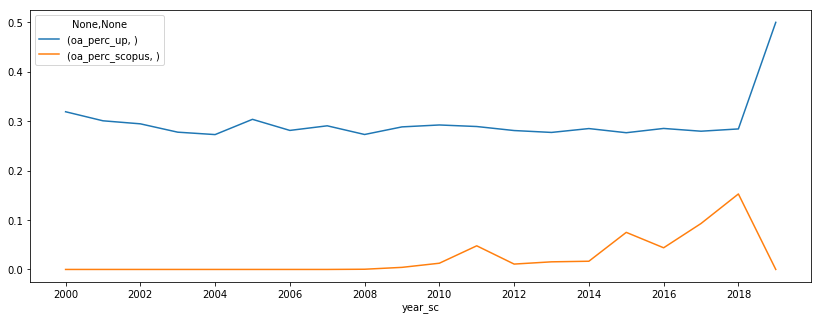

In [146]:
ax = oa_by_year.plot(y=['oa_perc_up','oa_perc_scopus'], xticks=range(2000,2019,2), figsize=(14,5) )

In [147]:
## Ratio of citations OA vs non OA, in UP and scopus

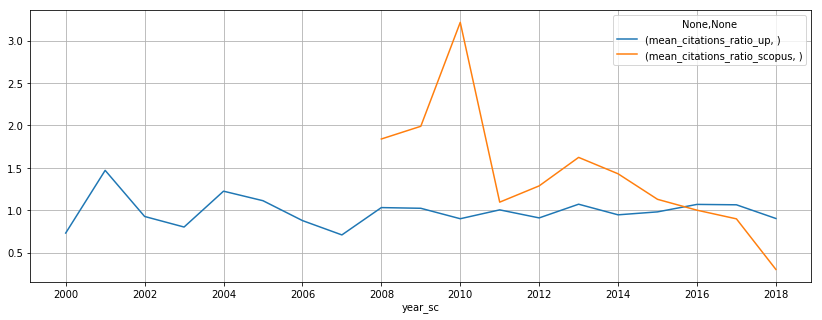

In [148]:
bx = oa_by_year.plot(y=['mean_citations_ratio_up','mean_citations_ratio_scopus'], xticks=range(2000,2019,2), figsize=(14,5) )

bx.grid(True,  axis='y' )
bx.grid(True)

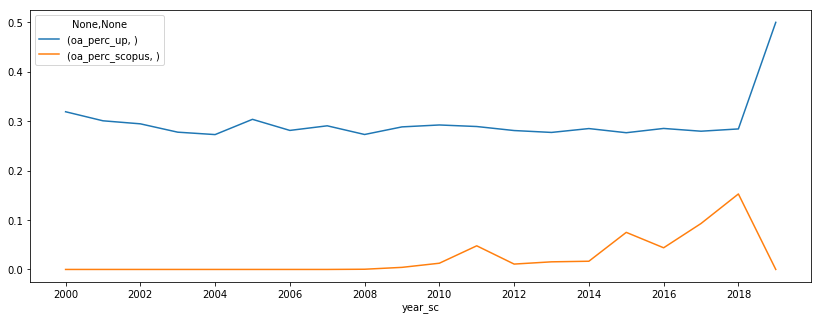

In [149]:
ax = oa_by_year.plot(y=['oa_perc_up','oa_perc_scopus'], xticks=range(2000,2019,2), figsize=(14,5) )

In [150]:
citations_by_oa = aj.groupby(aj.index.get_level_values('year_sc')).agg({
    ("total citations_up", False):sum, ("total citations_up", True):sum,
    ("total citations_scopus", False):sum, ("total citations_scopus", True):sum,
    ("total_up", False):sum, ("total_up", True):sum,
    ("total_scopus", False):sum, ("total_scopus", True):sum,
    } )

## by country


In [151]:
oa_by_IncomeGroup = aj.groupby( [aj.index.get_level_values('year_sc') ,  aj.index.get_level_values('IncomeGroup')]  ).agg({
    ("total citations_up", False):sum, ("total citations_up", True):sum,
    ("total citations_scopus", False):sum, ("total citations_scopus", True):sum,
    ("total_up", False):sum, ("total_up", True):sum,
    ("total_scopus", False):sum, ("total_scopus", True):sum,
    } )

In [152]:
oa_by_IncomeGroup = compute_oa_percentages(oa_by_IncomeGroup)

In [153]:
oa_by_IncomeGroup

total citations_up         total citations_scopus  \
                                         False    True                  False   
year_sc IncomeGroup                                                             
2000    High income                     2615.0   860.0                 6049.0   
        Lower middle income                4.0    18.0                   45.0   
        Upper middle income              206.0    89.0                  483.0   
2001    High income                     2415.0  1551.0                 7231.0   
        Lower middle income                8.0     9.0                   33.0   
        Upper middle income              287.0   154.0                  632.0   
2002    High income                     8145.0  3148.0                18946.0   
        Low income                         0.0     0.0                    0.0   
        Lower middle income              147.0    22.0                  250.0   
        Upper middle income              321.0   162.0                  749.0   
2003    High income                    16155.0  4858.0                35704.0   
        Low income                         2.0     0.0                    2.0   
        Lower middle income              139.0   117.0                  378.0   
        Upper middle income              758.0   281.0                 1760.0   
2004    High income                    10724.0  5029.0                27721.0   
        Lower middle income               83.0    11.0                  167.0   
        Upper middle income              677.0   238.0                 1573.0   
2005    High income                    17154.0  7677.0                42122.0   
        Lower middle income              151.0   100.0                  390.0   
        Upper middle income             1113.0  1159.0                 3384.0   
2006    High income                    12859.0  4338.0                29252.0   
        Low income                         0.0     0.0                    0.0   
        Lower middle income              289.0   160.0                  680.0   
        Upper middle income             2045.0   721.0                 4341.0   
2007    High income                    16453.0  4951.0                35137.0   
        Low income                         0.0     0.0                    1.0   
        Lower middle income              288.0   135.0                  728.0   
        Upper middle income             3781.0   870.0                 6616.0   
2008    High income                    20528.0  7941.0                47237.0   
        Low income                        23.0     3.0                   36.0   
...                                        ...     ...                    ...   
2012    Low income                        22.0     1.0                   34.0   
        Lower middle income              583.0   230.0                 1306.0   
        Upper middle income             2922.0   914.0                 6241.0   
2013    High income                    11975.0  4943.0                27362.0   
        Low income                         1.0     4.0                    8.0   
        Lower middle income              603.0   207.0                 1443.0   
        Upper middle income             2147.0   895.0                 5002.0   
2014    High income                     8231.0  3061.0                18450.0   
        Low income                         0.0     0.0                    5.0   
        Lower middle income              488.0   252.0                 1145.0   
        Upper middle income             2209.0   807.0                 4548.0   
2015    High income                    15595.0  5777.0                32491.0   
        Low income                         4.0     0.0                    6.0   
        Lower middle income             1183.0   500.0                 2232.0   
        Upper middle income             3287.0  1248.0                 6275.0   
2016    High income                     5981.0  2690.0     

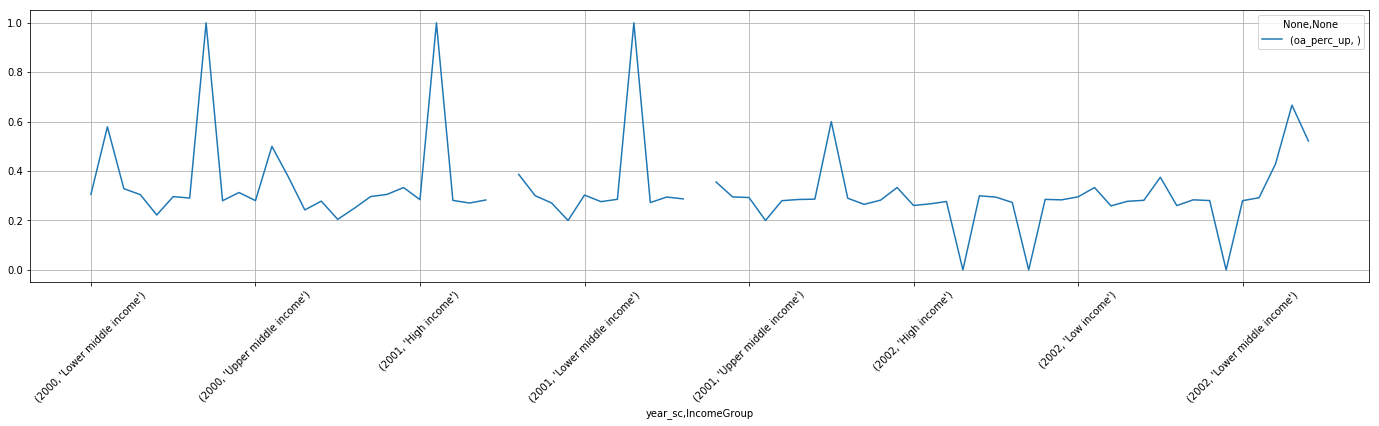

In [154]:
values = oa_by_IncomeGroup.index.tolist()
cplot = oa_by_IncomeGroup.plot(y=['oa_perc_up'] , figsize=(24,5) )
cplot.set_xticklabels(values, rotation=45)
cplot.grid(True)
#cplot.set()

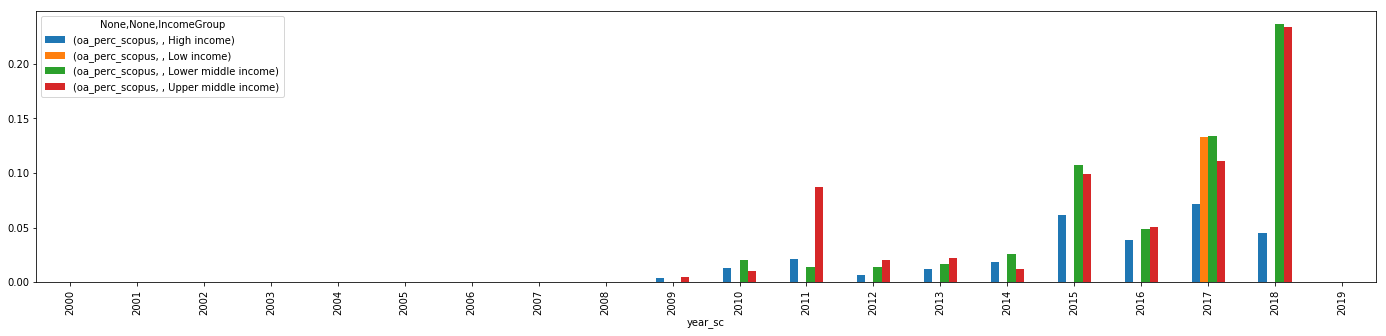

In [155]:
oa_by_IncomeGroup.unstack().plot(y=['oa_perc_scopus'], kind='bar', stacked=False, figsize=(24,5)
                                )

In [79]:
caxes = cplot.axes
cx=caxes.xaxis


In [81]:
cx.get_major_formatter()

In [94]:
oa_by_IncomeGroup.index.tolist()[55]

(2014, 'Upper middle income')

In [44]:
values

<bound method Index.to_series of MultiIndex(levels=[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], ['High income', 'Low income', 'Lower middle income', 'Upper middle income']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19], [0, 2, 3, 0, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 2, 3, 0, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 2, 3]],
           names=['year_sc', 'IncomeGroup'])>